<a href="https://colab.research.google.com/github/KHSakib/Final_Thesis_SAP/blob/main/Augmentation_Layer_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install required libraries
!pip install opencv-python-headless matplotlib

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/drive/MyDrive/Data set/Layer_Ensemble-check/true/0.mp4_0.jpg'
image = cv2.imread(image_path)
original = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)
x, y, w, h = cv2.boundingRect(contours[0])
closer_padding = 5
x_closer, y_closer, w_closer, h_closer = x-closer_padding, y-closer_padding, w+2*closer_padding, h+2*closer_padding
x_closer = max(x_closer, 0)
y_closer = max(y_closer, 0)
w_closer = min(w_closer, original.shape[1] - x_closer)
h_closer = min(h_closer, original.shape[0] - y_closer)
closer_cropped_image = original[y_closer:y_closer+h_closer, x_closer:x_closer+w_closer]
closer_cropped_image = cv2.cvtColor(closer_cropped_image, cv2.COLOR_BGR2RGB)

# Now, zoom in further on the cropped image
img_height, img_width = closer_cropped_image.shape[:2]
new_width = int(img_width * 0.4)
new_height = int(img_height * 0.6)
left = (img_width - new_width) // 2
top = (img_height - new_height) // 2
right = (img_width + new_width) // 2
bottom = (img_height + new_height) // 2
zoomed_in_image = closer_cropped_image[top:bottom, left:right]

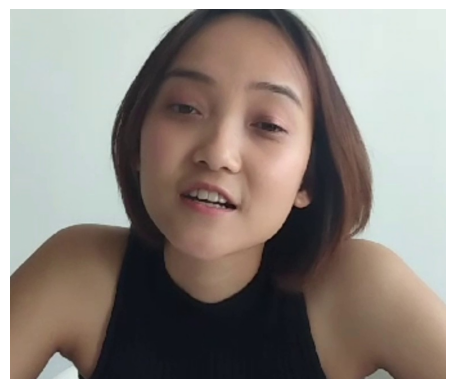

In [ ]:
# Display the zoomed-in image
plt.imshow(zoomed_in_image)
plt.axis('off')
plt.show()

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Directory where the images are stored
input_directory = '/content/drive/MyDrive/Data set/LD-Dataset-Full-Frames/lie/'
# Directory where the cropped images will be saved
output_directory = '/content/drive/MyDrive/Data set/LD-Dataset-Full-Frames-Augmented/lie/'

In [ ]:
# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# List all files in the input directory
files = os.listdir(input_directory)

In [ ]:
len(files)

2631

In [ ]:
for file in files:
    # Check if the file is an image
    if file.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Construct the full file path
        image_path = os.path.join(input_directory, file)
        image = cv2.imread(image_path)
        original = image.copy()
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        _, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)
        contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        contours = sorted(contours, key=cv2.contourArea, reverse=True)
        x, y, w, h = cv2.boundingRect(contours[0])
        closer_padding = 5
        x_closer, y_closer, w_closer, h_closer = x-closer_padding, y-closer_padding, w+2*closer_padding, h+2*closer_padding
        x_closer = max(x_closer, 0)
        y_closer = max(y_closer, 0)
        w_closer = min(w_closer, original.shape[1] - x_closer)
        h_closer = min(h_closer, original.shape[0] - y_closer)
        closer_cropped_image = original[y_closer:y_closer+h_closer, x_closer:x_closer+w_closer]
        closer_cropped_image = cv2.cvtColor(closer_cropped_image, cv2.COLOR_BGR2RGB)

        # Now, zoom in further on the cropped image
        img_height, img_width = closer_cropped_image.shape[:2]
        new_width = int(img_width * 0.4)
        new_height = int(img_height * 0.6)
        left = (img_width - new_width) // 2
        top = (img_height - new_height) // 2
        right = (img_width + new_width) // 2
        bottom = (img_height + new_height) // 2
        zoomed_in_image = closer_cropped_image[top:bottom, left:right]

        # Construct the output file path
        output_image_path = os.path.join(output_directory, 'zoomed_' + file)
        # Save the zoomed-in image
        cv2.imwrite(output_image_path, cv2.cvtColor(zoomed_in_image, cv2.COLOR_RGB2BGR))